- `Age` : Age of the patient - возраст пациента

- `Sex` : Sex of the patient - пол пациента

- `exng` : exercise induced angina (1 = yes; 0 = no) - стенокардия при физических нагрузках
 
- `ca` : number of major vessels (0-3) - количетсво крупных сосудов (возможно, нарушение формы сосуда подразумевается)

- `cp` : Chest Pain type chest pain type - тип боли в груди
 
    Value 1: typical angina - типичная стенокардия

    Value 2: atypical angina - атипичная стенокардия

    Value 3: non-anginal pain - неангинальная боль

    Value 4: asymptomatic - бессимптомная
    
- `trtbps` : resting blood pressure (in mm Hg) - артериальное давление в покое

- `chol` : cholestoral in mg/dl fetched via BMI sensor - уровень холестирина

- `fbs` : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) - уровень сахара в крови натощак

- `restecg` : resting electrocardiographic results 0 результаты электрокардиографии в покое

    Value 0: normal - нормальное

    Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) - наличие аномалии в проводящей системе сердца

    Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria - гипертрофия левого желудочка по критерию Эстеса
    
- `thalach` : maximum heart rate achieved - максимальня частота сердечных сокращений

- `target` : 0= less chance of heart attack 1= more chance of heart attack

# 1. Погружение в задачу и данные

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib

In [2]:
df = pd.read_csv(r'..\data\raw\heart.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df_dict = info(df)

In [ ]:
for key in df_dict:
    print(key)
    print(df_dict[key])

info
        name  non-nulls  nulls     type
0        age        303      0    int64
1        sex        303      0    int64
2         cp        303      0    int64
3     trtbps        303      0    int64
4       chol        303      0    int64
5        fbs        303      0    int64
6    restecg        303      0    int64
7   thalachh        303      0    int64
8       exng        303      0    int64
9    oldpeak        303      0  float64
10       slp        303      0    int64
11       caa        303      0    int64
12     thall        303      0    int64
13    output        303      0    int64
describe
              age         sex          cp      trtbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000

for key in df_dict:
    dirname = r'..\reports\data'
    filename = key + '.csv'
    filepath = pathlib.PurePath(dirname, filename)
    df_dict[key].to_csv(filepath)

In [ ]:
from src.data.df_info import hist_plots

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.describe().round(3)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000
mean,54.366,0.683,0.967,131.624,246.264,0.149,0.528,149.647,0.327,1.040,1.399,0.729,2.314,0.545
std,9.082,0.466,1.032,17.538,51.831,0.356,0.526,22.905,0.470,1.161,0.616,1.023,0.612,0.499
min,29.000,0.000,0.000,94.000,126.000,0.000,0.000,71.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,47.500,0.000,0.000,120.000,211.000,0.000,0.000,133.500,0.000,0.000,1.000,0.000,2.000,0.000
50%,55.000,1.000,1.000,130.000,240.000,0.000,1.000,153.000,0.000,0.800,1.000,0.000,2.000,1.000
75%,61.000,1.000,2.000,140.000,274.500,0.000,1.000,166.000,1.000,1.600,2.000,1.000,3.000,1.000
max,77.000,1.000,3.000,200.000,564.000,1.000,2.000,202.000,1.000,6.200,2.000,4.000,3.000,1.000


In [ ]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.nunique().sort_values()

sex           2
fbs           2
exng          2
output        2
restecg       3
slp           3
cp            4
thall         4
caa           5
oldpeak      40
age          41
trtbps       49
thalachh     91
chol        152
dtype: int64

Посколько тип данных совпадает практически по всем столбцам придётся руками поделить на categorical и numerical.

In [9]:
categorical_feat = ['sex',  'fbs', 'exng', 'restecg',  'slp', 'cp',  'thall','caa']
numerical_feat = ['age', 'oldpeak', 'trtbps', 'thalachh', 'chol']
print(categorical_feat)
print(numerical_feat)

['sex', 'fbs', 'exng', 'restecg', 'slp', 'cp', 'thall', 'caa']
['age', 'oldpeak', 'trtbps', 'thalachh', 'chol']


#### `ВЫВОД`:
Пропусков нет. Категориальных переменных - 8, числовых - 5

# 2. Очистка данных

In [ ]:
def check_for_nan(df):
    return df.isna().sum()/len(df)*100

In [ ]:
print(f"df\n{check_for_nan(df)}\n")

df
age         0.0
sex         0.0
cp          0.0
trtbps      0.0
chol        0.0
fbs         0.0
restecg     0.0
thalachh    0.0
exng        0.0
oldpeak     0.0
slp         0.0
caa         0.0
thall       0.0
output      0.0
dtype: float64



#### `ВЫВОД`:
Пропусков нет. Чистить данные не нужно.

# 3. Разведочный анализ данных

In [6]:
data_test = pd.melt(df, id_vars = ['output'])

In [7]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

def hist_plots (data, columns):
    for feat in columns:
        hist = sns.histplot(data[data['variable'] == feat], x = 'value', hue = 'output', kde = True);
        hist.axes.set_title(feat, fontsize = 14)
        plt.show()

def box_plots (data, columns):
    for feat in columns:
        box = sns.boxplot( x = data['output'], y = data[data['variable'] == feat]['value']);
        box.axes.set_title(feat, fontsize = 14)
        plt.show()

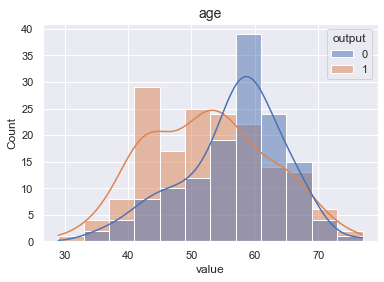

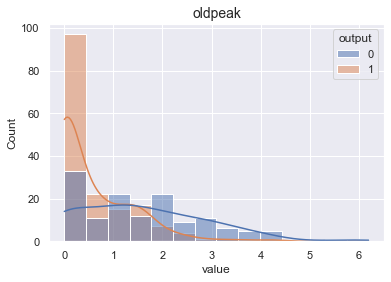

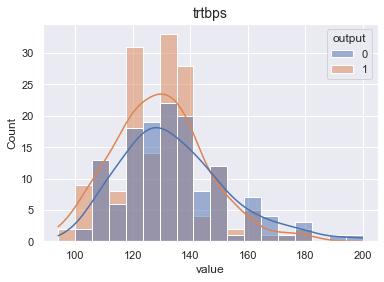

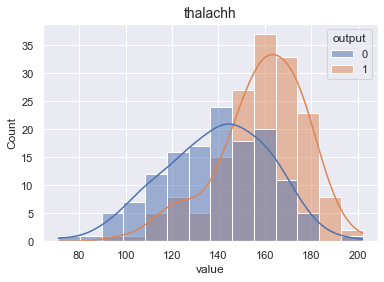

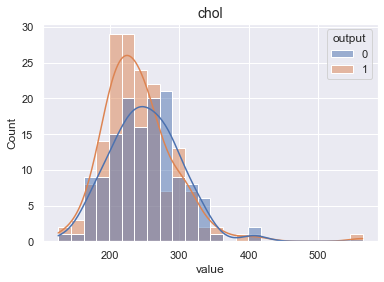

In [8]:
hist_plots(data_test, numerical_feat)

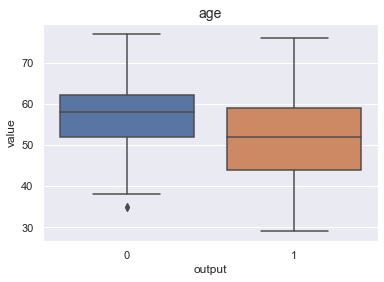

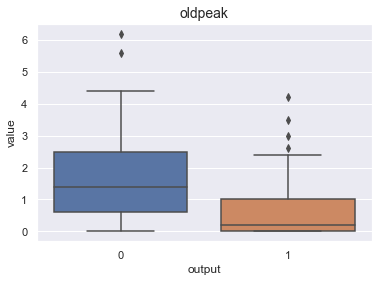

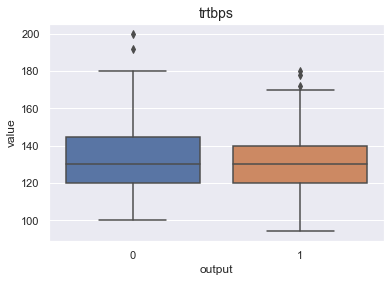

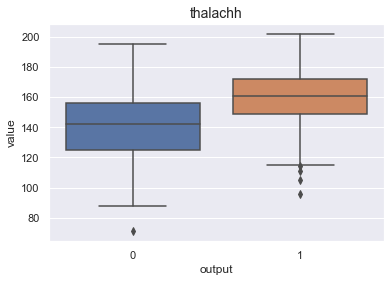

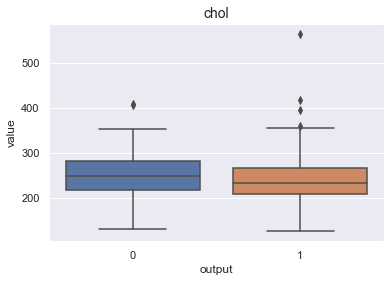

In [9]:
box_plots(pd.melt(df, id_vars = ['output']), numerical_feat)

#### `ВЫВОД`:
Согласно гистограммам, наблюдается большая схожесть в данных `trtbps` - возможно, их придётся выбросить из обучающей выборки вввиду низкой информативности.

Видим, что данные  имеют нормальное распределние с небольшими смещениями влево или вправо. Описание по столбцу `oldpeak` отсутствует. 
На boxplots не наблюдается большого количества выбросов, поэтому их обрабатывать скорее всего не имеет смысла.

In [10]:
df.shape

(303, 14)

In [39]:
df_test = df
for feat in numerical_feat:
    upper_quant = (df_test[feat].quantile(0.75) - df_test[feat].quantile(0.25)) * 1.5 + df_test[feat].quantile(0.75)
    lower_quant = df_test[feat].quantile(0.25) - (df_test[feat].quantile(0.75) - df_test[feat].quantile(0.25)) * 1.5
    print(upper_quant, lower_quant)
    df_test = df_test[(df[feat] < upper_quant) & (df[feat] > lower_quant)]

81.25 27.25
4.0 -2.4000000000000004
170.0 90.0
220.875 79.875
364.25 118.25


C:\Users\User\AppData\Local\Temp\ipykernel_19820\3415769687.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_test = df_test[(df[feat] < upper_quant) & (df[feat] > lower_quant)]


In [40]:
df_test.head(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [38]:
df.head(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [41]:
df['age'] > 50

0       True
1      False
2      False
3       True
4       True
       ...  
298     True
299    False
300     True
301     True
302     True
Name: age, Length: 303, dtype: bool

In [43]:
df[df['age'] > 50]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df_test = df

In [5]:
df_test.shape

(303, 14)

In [29]:
def iqr_filter(numerical_feat):
    upper_quant = (df_test[numerical_feat].quantile(0.75) - df_test[numerical_feat].quantile(0.25)) * 1.5 + df_test[numerical_feat].quantile(0.75)
    lower_quant = df_test[numerical_feat].quantile(0.25) - (df_test[numerical_feat].quantile(0.75) - df_test[numerical_feat].quantile(0.25)) * 1.5
    mask = (df_test[numerical_feat] < upper_quant) & (df_test[numerical_feat] > lower_quant)
    return mask

In [30]:
from functools import reduce

def conjunction(arr: list[pd.Series]) -> pd.Series:
    return reduce(lambda x, y: x & y, arr)



In [31]:
all_mask = [IQR(feature) for feature in numerical_feat]

In [32]:
total_mask = conjunction(all_mask)

In [35]:
total_mask

0      True
1      True
2      True
3      True
4      True
       ... 
298    True
299    True
300    True
301    True
302    True
Length: 303, dtype: bool

In [33]:
df_new = df[total_mask]

In [38]:
tmp_df = pd.DataFrame({
    "x": [1, 2, 3, 4, 5,],
    "y": [1,2,3,4,5,]
})
tmp_df

,x,y
0,1,1
1,2,2
2,3,3
3,4,4
4,5,5


In [39]:
mask = pd.Series([True, True, False, True, True])

In [40]:
tmp_df[mask]

,x,y
0,1,1
1,2,2
3,4,4
4,5,5


In [34]:
df_new.shape

(279, 14)

In [28]:
numerical_feat

['age', 'oldpeak', 'trtbps', 'thalachh', 'chol']

In [35]:
df_new = pd.DataFrame(map(IQR, numerical_feat))

81.25 27.25
4.0 -2.4000000000000004
170.0 90.0
214.75 84.75
369.75 115.75


In [36]:
df_new

,0
0,None
1,None
2,None
3,None
4,None


In [14]:
def sns_subplots(df, columns_names, figsize, plot_type, *plot_args, **plot_kwargs):
    prep_data = pd.melt(df[columns_names + ['output']], id_vars = ['output'])
    grid = sns.FacetGrid(prep_data, row='variable', sharex=False, sharey=False, height=figsize, hue = 'output')
    return grid.map(plot_type, *plot_args, **plot_kwargs)

c:\Users\User\.conda\envs\heart-attack-denv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cp', ylabel='count'>

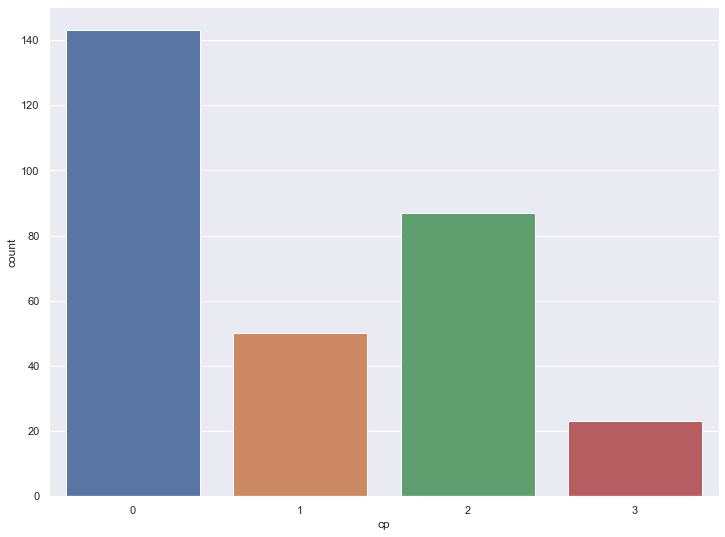

In [10]:
sns.countplot(df['cp'])

In [15]:
def draw_countplot_plots(df, columns_names, figsize=5):
    return sns_subplots(df, columns_names, figsize, sns.countplot, 'value', palette="Paired")

c:\Users\User\.conda\envs\DS_pr\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


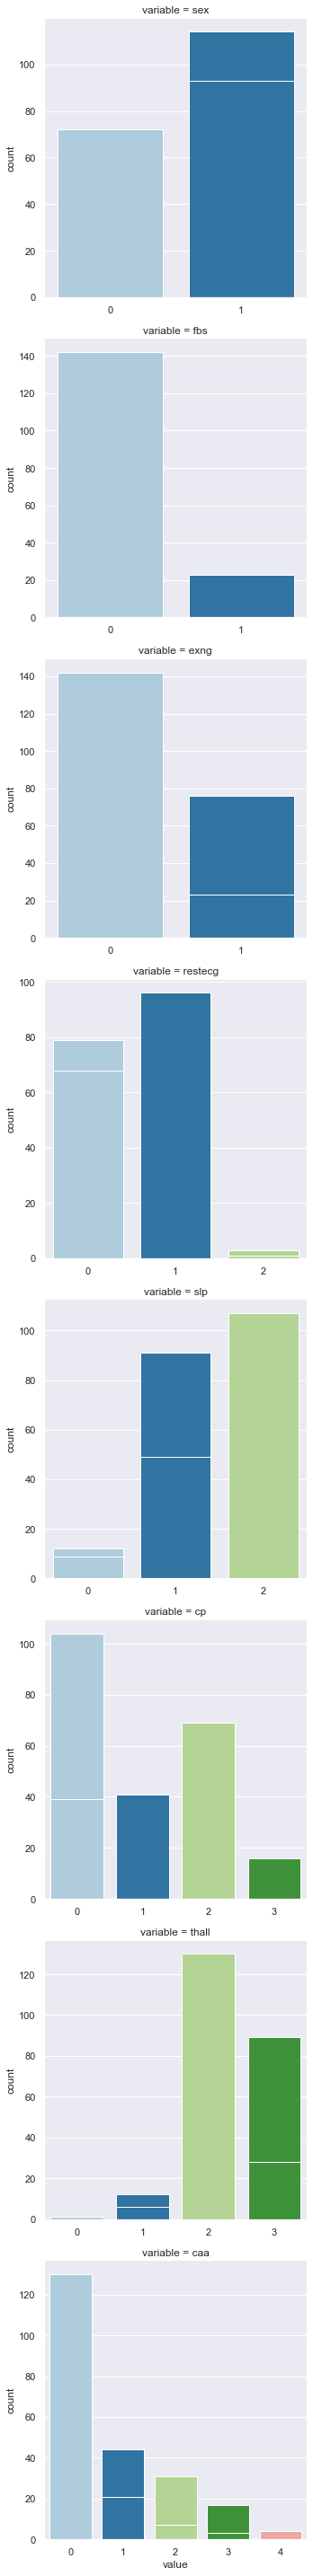

In [16]:
draw_countplot_plots(df, categorical_feat);

In [17]:
for feat in categorical_feat:
    print(f"{feat}\n{df[feat].value_counts(normalize=True)*100}\n")

sex
1    68.316832
0    31.683168
Name: sex, dtype: float64

fbs
0    85.148515
1    14.851485
Name: fbs, dtype: float64

exng
0    67.326733
1    32.673267
Name: exng, dtype: float64

restecg
1    50.165017
0    48.514851
2     1.320132
Name: restecg, dtype: float64

slp
2    46.864686
1    46.204620
0     6.930693
Name: slp, dtype: float64

cp
0    47.194719
2    28.712871
1    16.501650
3     7.590759
Name: cp, dtype: float64

thall
2    54.785479
3    38.613861
1     5.940594
0     0.660066
Name: thall, dtype: float64

caa
0    57.755776
1    21.452145
2    12.541254
3     6.600660
4     1.650165
Name: caa, dtype: float64



<AxesSubplot:title={'center':'Relationship between Age and HA'}, xlabel='age'>

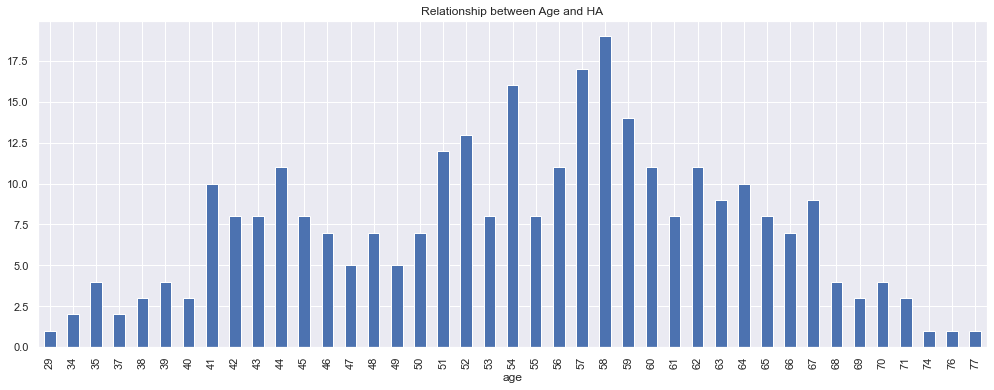

In [18]:
df.groupby('age')["output"].count().plot(kind="bar",figsize=(17,6), title="Relationship between Age and HA")

#### `ВЫВОД`:
Пойдём по порядку:
- `Sex` - видим, что разница в количестве подобных по типу гендера больше 100%. Вероятнее всего, мужчины более подвержены риску сердечно-сосудистых заболеваний.

- `fbs` - а вот даибетиков среди сердечников не так и много, всего около 14%. Вероятнее всего, диабет слабо связан с наличием сердечно сосудистых заболеваний.

- `exng` - стенокардия наблюдается у трети пациентов

- `restecg` - тут получилось 50 на 50 - по результатам ЭКГ половина пациентов не имеет никаких аномалий, но тут посмотрим подробнее процент людей с Heartattack

- `slp` - шо це - неизвестно. Можно наверно дропнуть нафиг

- `сp` - здесь также. Половина пациентов имеет жалобы на боли в груди типичные для стенокардии. У 7.5 процентов боль бессимптомная

- `thall` - шо це - неизвестно. Можно наверно дропнуть нафиг

- `caa` - скорее всего здесь данные о крупных сосудах сердца, либо о отделах. Больше половины пациентов - 57 не имеют никаких проблем.

# 4. Статистический анализ данных

<AxesSubplot:>

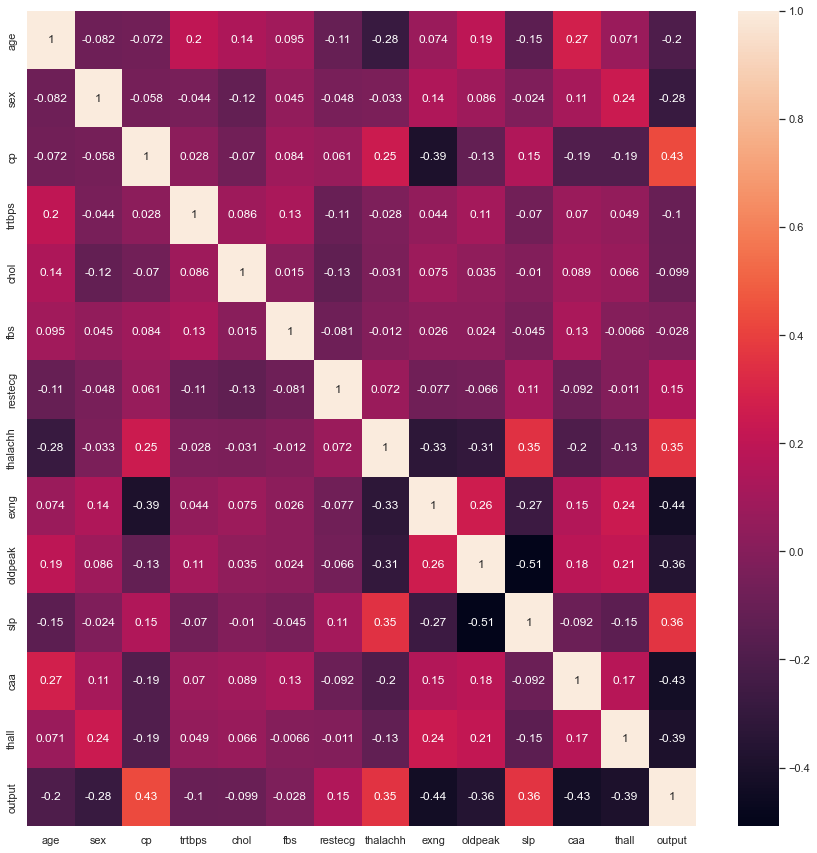

In [19]:
sns.set(rc = {'figure.figsize':(15,15)})       
sns.heatmap(df.corr('kendall'), annot=True)

<AxesSubplot:>

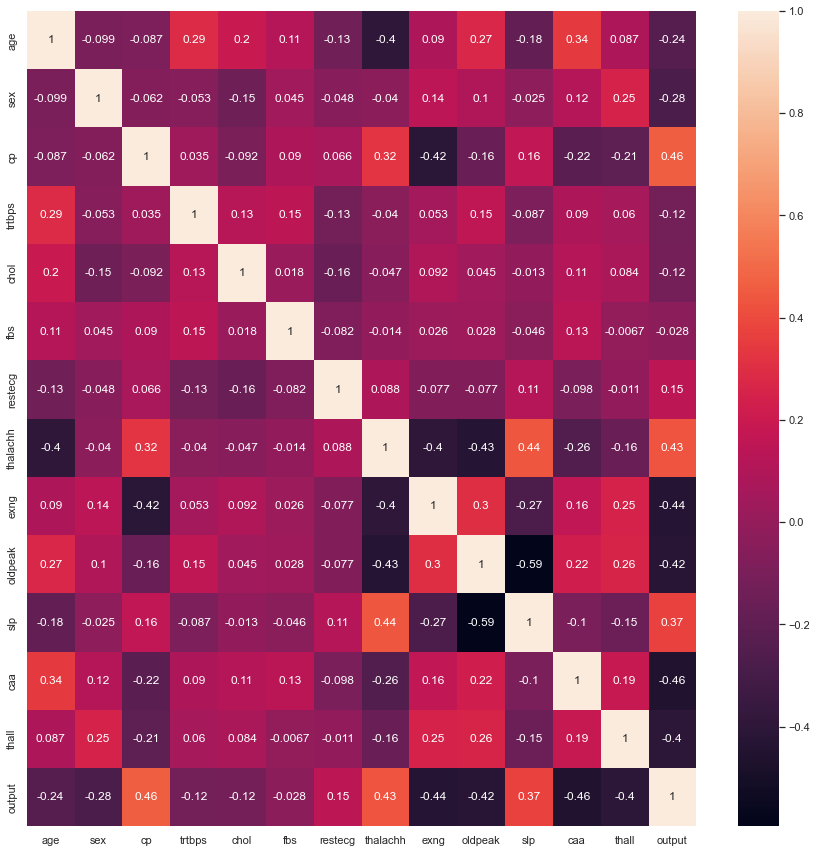

In [20]:
sns.set(rc = {'figure.figsize':(15,15)})       
sns.heatmap(df.corr('spearman'), annot=True)

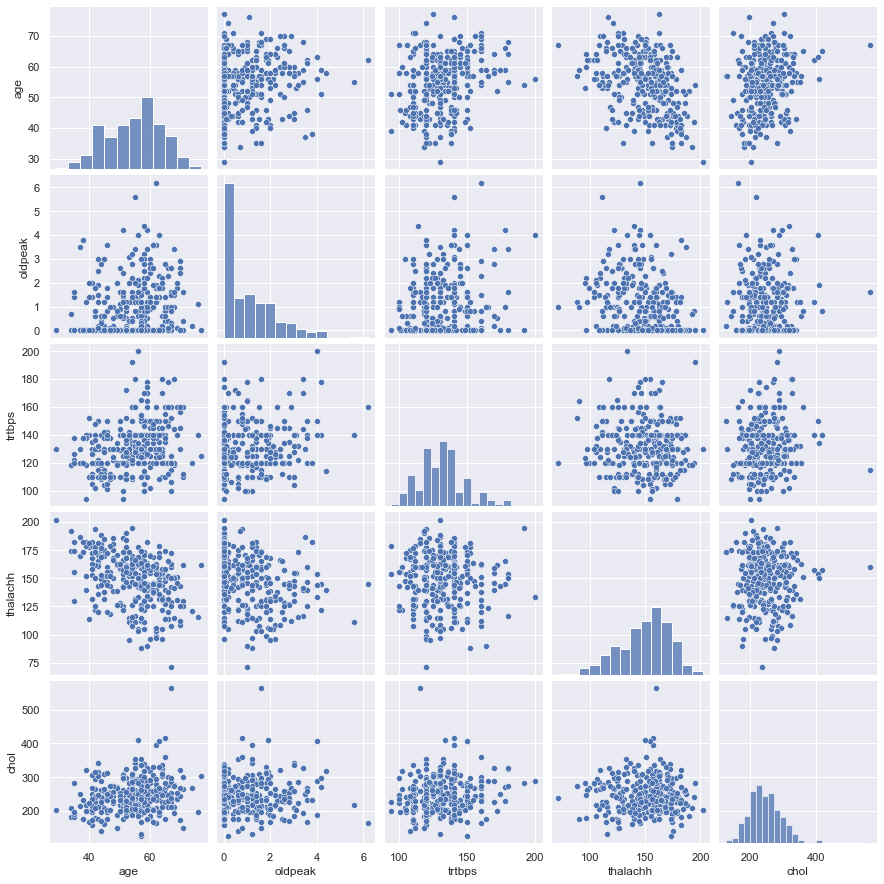

In [21]:
sns.pairplot(df[numerical_feat]);

In [22]:
print(df[numerical_feat].var())

age           82.484558
oldpeak        1.348095
trtbps       307.586453
thalachh     524.646406
chol        2686.426748
dtype: float64


In [23]:
df_test = df.drop(columns = categorical_feat + ['output'])

In [24]:
df_test.head()

,age,trtbps,chol,thalachh,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6


In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
results = []
for feat in numerical_feat:
    model = LinearRegression()
    target = df_test[feat]
    features = df_test.drop(columns = [feat])
    model.fit(features, target)
    result = model.score(features, target)
    results.append(result)

dataf = pd.DataFrame({'Признак':numerical_feat, 'R2': results})

In [27]:
dataf

,Признак,R2
0,age,0.259539
1,oldpeak,0.151369
2,trtbps,0.113154
3,thalachh,0.246433
4,chol,0.056619


#### `ВЫВОД`:
По результатам pairplot была заметан относительно небольшая взаимосвязь между между `age` и `thalachh` и `chol`. Но по результатам линейной регрессии особой корреляции в них не видно.

По данным `heatmap` не наблюдается высокой корреляции в данных.

# 5. Отбор признаков

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.feature_selection import mutual_info_classif
from sklearn.svm import SVC
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest, f_classif

In [33]:
target = df['output']
features = df.drop(columns = ['output'], axis = 1)

## 5.1 Критерий хи-квадрат и взаимная информация для категориальных переменных

In [ ]:
# def chi2(dataframe: pd.DataFrame):
#     target = dataframe["output"]
#     features = dataframe.drop(columns=["output"], axis=1)
#     chi2_test = SelectKBest(score_func=chi2, k=6)
#     chi2_test.fit(features[categorical_feat], target)
#     # ?????chi2_scores = pd.DataFrame(list(zip(categorical_feat, chi2_test.scores_, chi2_test.pvalues_)), columns=['ftr', 'score', 'pval'])
#     chi2_scores_best = np.asarray(categorical_feat)[chi2_test.get_support()]
#     chi2_features = features[chi2_scores_best + numerical_feat]
#     return chi2_features


# def anova(dataframe: pd.DataFrame):
#     target = dataframe["output"]
#     features = dataframe.drop(columns=["output"], axis=1)
#     anova_filter = SelectKBest(f_classif, k=4)
#     anova_filter.fit(features[numerical_feat], target)
#     anova_scores_best = np.asarray(numerical_feat)[anova_filter.get_support()]
#     # ?????anova_results = pd.DataFrame(list(zip(numerical_feat, anova_filter.scores_, anova_filter.pvalues_)), columns=['ftr', 'score', 'pval'])
#     anova_features = [anova_scores_best + categorical_feat]
#     return anova_features

In [38]:
features[categorical_feat].columns[0:len(df.columns)-1]

Index(['sex', 'fbs', 'exng', 'restecg', 'slp', 'cp', 'thall', 'caa'], dtype='object')

In [43]:
categorical_feat

['sex', 'fbs', 'exng', 'restecg', 'slp', 'cp', 'thall', 'caa']

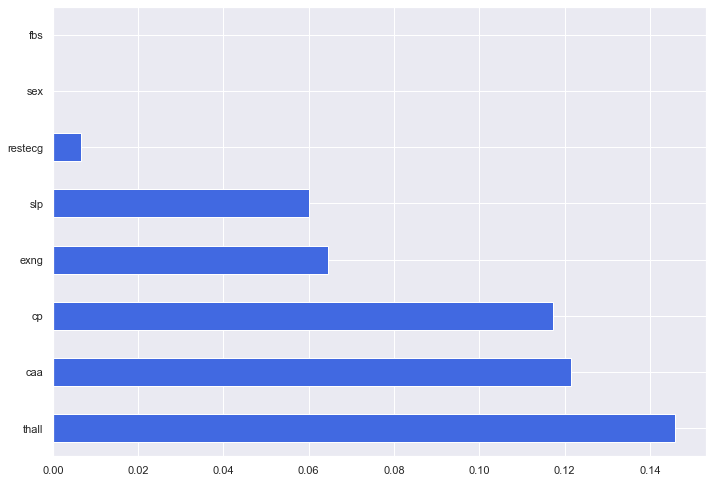

In [57]:
importances = mutual_info_classif(features[categorical_feat], target, random_state = 87)
feat_importances = pd.Series(importances, features[categorical_feat].columns[0:len(df.columns)-1]).sort_values(ascending=False)
#feat_importances = pd.Series(importances, categorical_feat).sort_values(ascending=True)
feat_importances.plot(kind = 'barh', color = 'royalblue')
plt.show()

In [52]:
feat_importances.index

Index(['thall', 'caa', 'cp', 'exng', 'slp', 'restecg', 'sex', 'fbs'], dtype='object')

In [54]:
feat_importances[:-2]

thall      0.145819
caa        0.121447
cp         0.117381
exng       0.064608
slp        0.059981
restecg    0.006603
dtype: float64

In [45]:
new = feat_importances.sort_values(ascending=False)

In [46]:
print(new.index[:-2])

Index(['thall', 'cp', 'exng', 'caa', 'slp', 'sex'], dtype='object')


In [ ]:
selected_feat = feat_importances.index

In [21]:
mutual_df = pd.DataFrame({'Features': categorical_feat, 'Values': importances})

In [22]:
mutual_df

,Features,Values
0,sex,0.060940
1,fbs,0.011608
2,exng,0.115662
3,restecg,0.000000
4,slp,0.102570
5,cp,0.144597
6,thall,0.168414
7,caa,0.111716


In [35]:
mutual_sorted = mutual_df.sort_values(by = 'Values',ascending=False)

In [36]:
mutual_sorted

,Features,Values
6,thall,0.168414
5,cp,0.144597
2,exng,0.115662
7,caa,0.111716
4,slp,0.102570
0,sex,0.060940
1,fbs,0.011608
3,restecg,0.000000


In [13]:
feat_importances

sex        0.060940
fbs        0.011608
exng       0.115662
restecg    0.000000
slp        0.102570
cp         0.144597
thall      0.168414
caa        0.111716
dtype: float64

In [31]:
drop_mi = ['restecg', 'sex']

In [32]:
# Score function Chi2 tells the feature to be selected using Chi Square
chi2_test = SelectKBest(score_func=chi2, k=6)
chi2_test.fit(features[categorical_feat], target)
chi2_scores = pd.DataFrame(list(zip(categorical_feat, chi2_test.scores_, chi2_test.pvalues_)), columns=['ftr', 'score', 'pval'])

In [33]:
chi2_scores

,ftr,score,pval
0,sex,7.576835,5.912318e-03
1,fbs,0.202934,6.523632e-01
2,exng,38.914377,4.428074e-10
3,restecg,2.978271,8.438939e-02
4,slp,9.804095,1.741237e-03
5,cp,62.598098,2.534982e-15
6,thall,5.791853,1.610061e-02
7,caa,66.440765,3.605677e-16


In [34]:
chi2_scores_best = np.asarray(categorical_feat)[chi2_test.get_support()]

In [35]:
chi2_scores_best

array(['sex', 'exng', 'slp', 'cp', 'thall', 'caa'], dtype='<U7')

In [36]:
drop_chi = ['restecg', 'fbs']

#### `ВЫВОД`:
По результатам mutual_information и chi2 можно отбросить следующие признаки: `fbs` и  `rectecg`


## 5.2 Коэффициент корреляции ANOVA для числовых переменных

In [37]:
anova_filter = SelectKBest(f_classif, k=4)
anova_filter.fit(features[numerical_feat], target)
anova_results = pd.DataFrame(list(zip(numerical_feat, anova_filter.scores_, anova_filter.pvalues_)), columns=['ftr', 'score', 'pval'])

In [38]:
anova_results

,ftr,score,pval
0,age,16.116700,7.524801e-05
1,oldpeak,68.551439,4.085346e-15
2,trtbps,6.458169,1.154606e-02
3,thalachh,65.120104,1.697338e-14
4,chol,2.202983,1.387903e-01


In [39]:
anova_scores_best = np.asarray(numerical_feat)[anova_filter.get_support()]

In [40]:
anova_scores_best

array(['age', 'oldpeak', 'trtbps', 'thalachh'], dtype='<U8')

In [41]:
drop_anova = ['chol']

In [42]:
total_drop = [drop_chi, drop_mi, drop_anova]

In [43]:
total_drop

[['restecg', 'fbs'], ['restecg', 'sex'], ['chol']]

#### `ВЫВОД`:
По результатам ANOVA : `chol`

# 6. Подготовка данных и обучение моделей

In [44]:
features = pd.get_dummies(features, columns = categorical_feat, drop_first = True)

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#MinMaxScaler
#RobsustScaler

In [46]:
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.25, random_state=12345)

In [47]:
scaler = StandardScaler()
scaler.fit(features_train)

features_train = scaler.transform(features_train)
features_test = scaler.transform(features_test) 

In [48]:
LRclassifier = LogisticRegression()
LRclassifier.fit(features_train, target_train)

predLRC = LRclassifier.predict(features_test)

print(classification_report(target_test, predLRC))
print(confusion_matrix(target_test, predLRC))
LRCAcc = accuracy_score(predLRC, target_test)
print('LR accuracy: {:.2f}%'.format(LRCAcc*100))

              precision    recall  f1-score   support

           0       0.74      0.82      0.78        34
           1       0.84      0.76      0.80        42

    accuracy                           0.79        76
   macro avg       0.79      0.79      0.79        76
weighted avg       0.80      0.79      0.79        76

[[28  6]
 [10 32]]
LR accuracy: 78.95%


<AxesSubplot:>

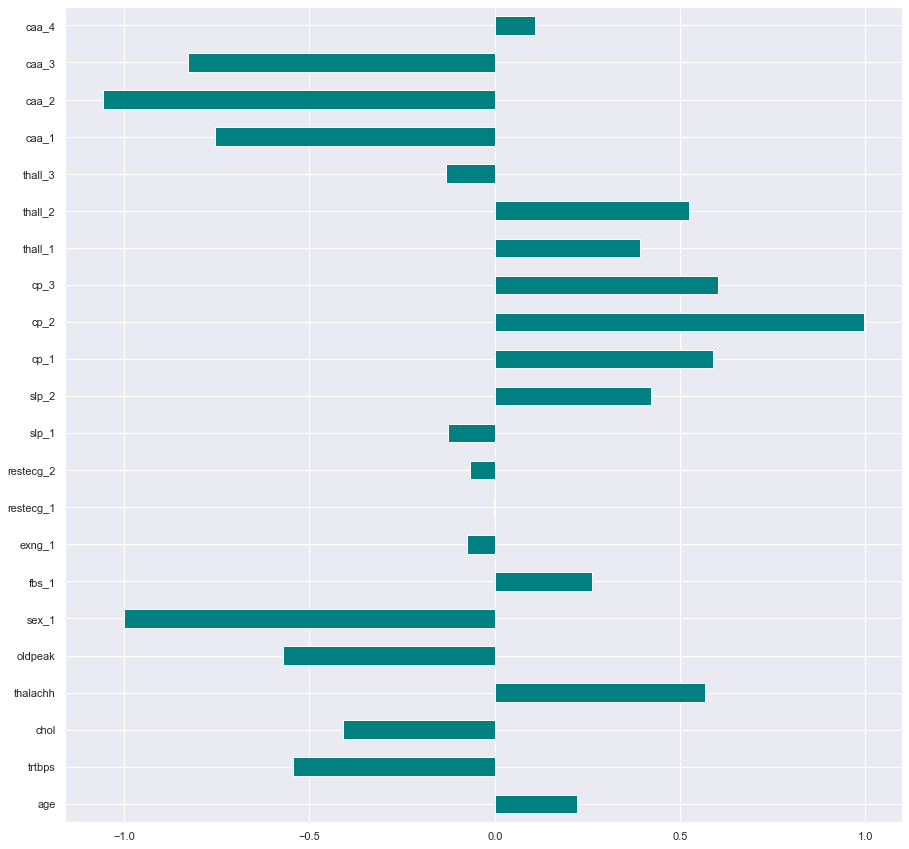

In [49]:
importancesLR = LRclassifier.coef_[0]
feat_importancesLR = pd.Series(importancesLR, features.columns[0:len(features.columns)])
feat_importancesLR.plot(kind = 'barh', color = 'teal')

In [50]:
SVCclassifier = SVC(kernel='rbf', max_iter=300)
SVCclassifier.fit(features_train, target_train)

predSVC = SVCclassifier.predict(features_test)

print(classification_report(target_test, predSVC))
print(confusion_matrix(target_test, predSVC))

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(predSVC, target_test)
print('SVC accuracy: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82        34
           1       0.89      0.79      0.84        42

    accuracy                           0.83        76
   macro avg       0.83      0.83      0.83        76
weighted avg       0.84      0.83      0.83        76

[[30  4]
 [ 9 33]]
SVC accuracy: 82.89%


In [51]:
def par(x: np.array) -> np.array:
    return 5 * x **2 + 5

In [52]:
x = np.linspace(-5, 5, 100)
y = par(x)

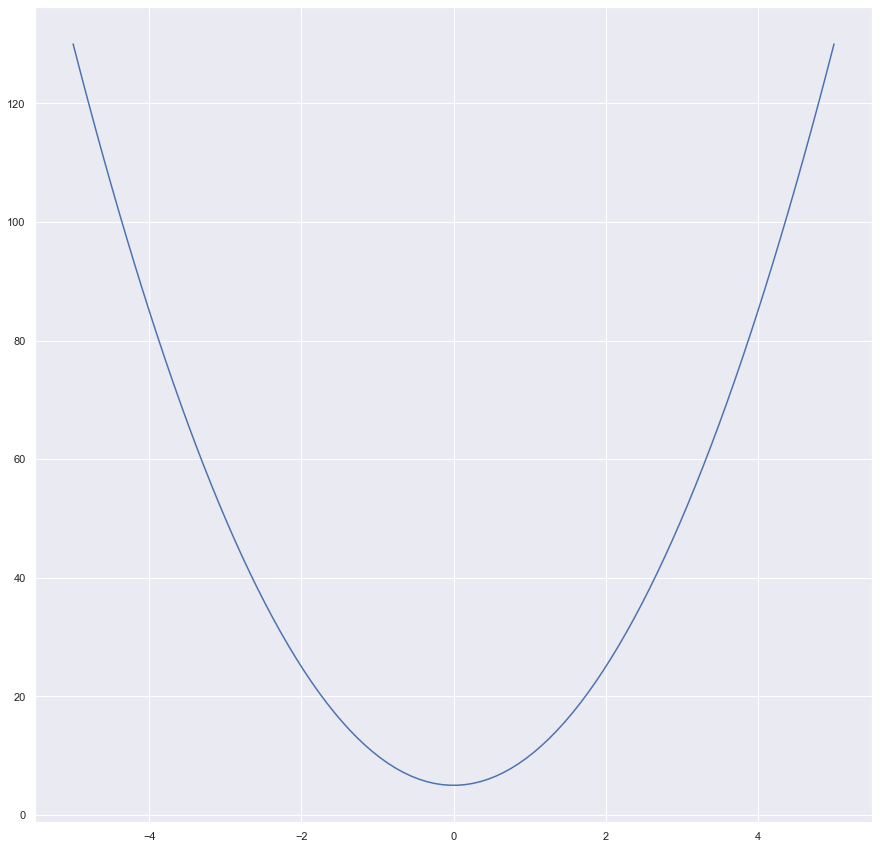

In [53]:
plt.plot(x,y)

In [54]:
df = pd.DataFrame({'X': x, 'Y': y}) 

In [55]:
df

,X,Y
0,-5.00000,130.000000
1,-4.89899,125.000510
2,-4.79798,120.103051
3,-4.69697,115.307622
4,-4.59596,110.614223
...,...,...
95,4.59596,110.614223
96,4.69697,115.307622
97,4.79798,120.103051
98,4.89899,125.000510


In [56]:
df.corr('spearman')

,X,Y
X,1.000000,-0.002646
Y,-0.002646,1.000000


In [57]:
df.corr('kendall')

,X,Y
X,1.000000,-0.002228
Y,-0.002228,1.000000
